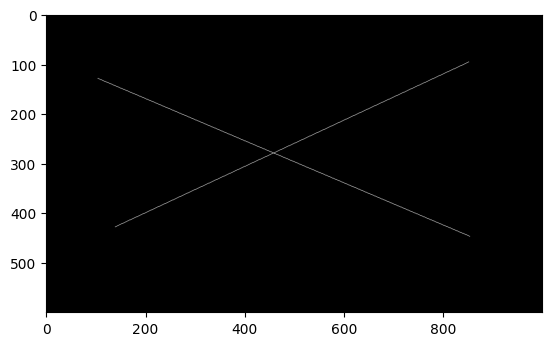

In [42]:
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from matplotlib import pyplot as plt
import math

img = cv2.imread("lines1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')


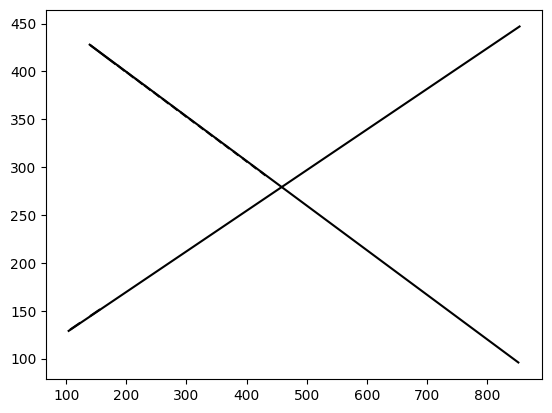

In [43]:
'''
Try Hough in scikit and visualize hough accumulator
'''
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
lines = probabilistic_hough_line(img, threshold=10, line_length=5,
                                 line_gap=3)
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]), color="black")



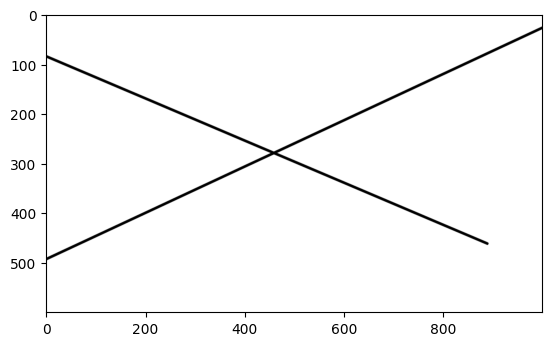

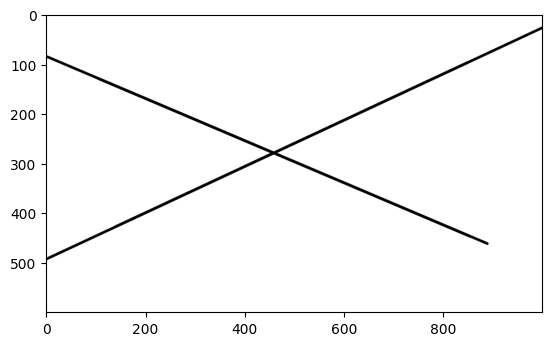

In [44]:
'''
 Hough line in opencv
 '''
white = np.zeros_like(img)

white[:,:] = 255
lines = cv2.HoughLines(img, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(white, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(white, cmap='gray')
plt.show()

# Probabilistic Line Transform
linesP = cv2.HoughLinesP(img, 1, np.pi / 180, 50, None, 50, 10)

    # Draw the lines
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(white, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
plt.imshow(white, cmap='gray')